# Timing matrix-vector multiplication

In [1]:
using LinearAlgebra, Plots

Let's repeat the experiment of the previous figure for more, and larger, values of $n$.

In [2]:
randn(4,4)*randn(4);  # throwaway to force compilation

n = 400:200:6000
t = zeros(size(n))
for (i,n) in enumerate(n) 
    A = randn(n,n)  
    x = randn(n)
    t[i] = @elapsed for j = 1:10; A*x; end
end

Plotting the time as a function of $n$ on log-log scales is equivalent to plotting the logs of the variables, but is formatted more neatly.

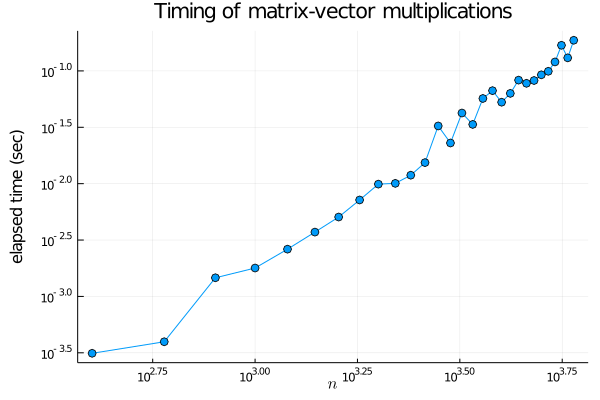

In [3]:
plot(n,t, m=:o,
    xaxis=(:log10,"\$n\$"), yaxis=(:log10,"elapsed time (sec)"),
    title="Timing of matrix-vector multiplications", label="data", leg=false)

You can see that while the full story is complicated, the graph is trending to a straight line of positive slope. For comparison, we can plot a line that represents $O(n^2)$ growth exactly. (All such lines have slope equal to 2.)

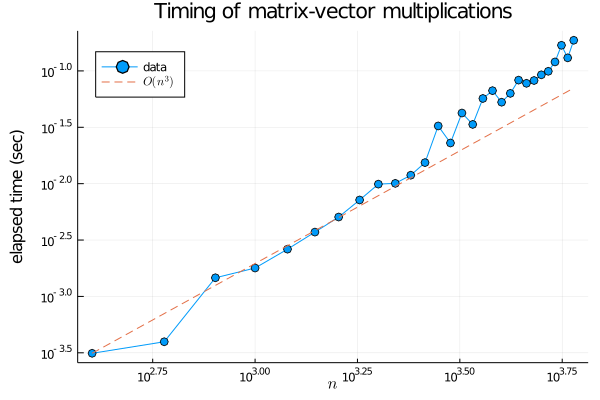

In [4]:
plot!(n,(n/n[1]).^2*t[1], l=:dash,
    label="\$O(n^3)\$", legend=:topleft)